In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import itertools as itr
import copy
from boundaries import WallBoundary, PressureBoundary, VelocityBoundary
from generators import WallGenerators
from simulation import Simulation
import pandas as pd
import random

ImportError: cannot import name 'WallBoundary' from partially initialized module 'boundaries' (most likely due to a circular import) (/home/puripat/Documents/Workspace/AIBuilder-LatticeBoltzmann/boundaries.py)

In [8]:
main = pd.DataFrame()
count = 0


Total Number Of Cobinations: 494
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (1, 0), (1, 10), (1, 18), (1, 31), (2, 0), (2, 10), (2, 18), (2, 31), (3, 0), (3, 10), (3, 18), (3, 31), (4, 0), (4, 10), (4, 18), (4, 31), (5, 0), (5, 10), (5, 18), (5, 31), (6, 0), (6, 10), (6, 18), (6, 31), (7, 0), (7, 10), (7, 18), (7, 31), (8, 0), (8, 10), (8, 18), (8, 31), (9, 0), (9, 10), (9, 18), (9, 31), (10, 0), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 16), (10, 17), (10, 18), (10, 31), (11, 0), (11, 31), (12, 0), (12, 31), (13, 0), (13, 31), (14, 0), (14, 31), (15, 0), (15, 31), (16, 0), (16, 31), (17, 0), (17, 31), (18, 0), (18, 31), (19, 0), (19, 31), (20, 0), (20, 31), (21, 0), (21, 31), (22, 0), (22, 31), (23, 0), (23, 31), (24, 0), (24, 31), (25, 0), (25, 31), (26, 0), (26, 31), (27, 0), (27, 31), (28, 0), (28, 31), (29, 0), (29, 31), (

c:\Users\LENOVO\Documents\GitHub\Elevator\AIBuilder-LatticeBoltzmann\simulation.py:52: RuntimeWarning: invalid value encountered in divide
  self.speedY = self.momentumY / self.density
c:\Users\LENOVO\Documents\GitHub\Elevator\AIBuilder-LatticeBoltzmann\simulation.py:53: RuntimeWarning: invalid value encountered in divide
  self.speedX = self.momentumX / self.density
c:\Users\LENOVO\Documents\GitHub\Elevator\AIBuilder-LatticeBoltzmann\simulation.py:69: RuntimeWarning: invalid value encountered in divide
  self.speedY = self.momentumY / self.density
c:\Users\LENOVO\Documents\GitHub\Elevator\AIBuilder-LatticeBoltzmann\simulation.py:70: RuntimeWarning: invalid value encountered in divide
  self.speedX = self.momentumX / self.density


Done!
It exploded :(


Simulation 3/494
position: (0, 2) direction: 0...
Done!
It survived! Time: 5


Simulation 4/494
position: (0, 2) direction: 4...
Done!
It exploded :(


Simulation 5/494
position: (0, 2) direction: 7...
Done!
It exploded :(


Simulation 6/494
position: (0, 3) direction: 0...
Done!
It survived! Time: 5


Simulation 7/494
position: (0, 3) direction: 4...
Done!
It exploded :(


Simulation 8/494
position: (0, 3) direction: 7...
Done!
It exploded :(


Simulation 9/494
position: (0, 4) direction: 0...
Done!
It survived! Time: 5


Simulation 10/494
position: (0, 4) direction: 4...
Done!
It exploded :(


Simulation 11/494
position: (0, 4) direction: 7...
Done!
It exploded :(


Simulation 12/494
position: (0, 5) direction: 0...
Done!
It survived! Time: 5


Simulation 13/494
position: (0, 5) direction: 4...
Done!
It exploded :(


Simulation 14/494
position: (0, 5) direction: 7...
Done!
It exploded :(


Simulation 15/494
position: (0, 6) direction: 0...
Done!
It survived! Ti

KeyboardInterrupt: 

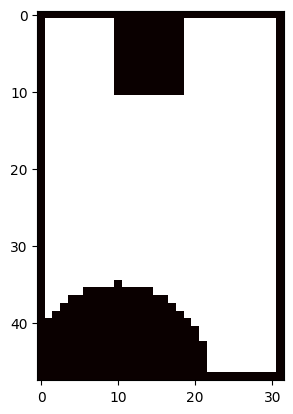

In [10]:
yResolution = 48
xResolution = 32
ACspeed = 1

walls = WallBoundary(yResolution, xResolution)
walls.borderWall()
conditions = walls.generateRoom()
walls.generateIndex()
walls.generateACPosandDirections()

plt.imshow(walls.invertedBoundary, cmap="hot", interpolation="nearest")
#plt.savefig(f'data/images/{count}.png')

bestPos = []
bestDirection = []
bestTime = -100

total = len([x for i in walls.possibleACDirections for x in i])
print(f"Total Number Of Cobinations: {total}")
start = 1
print(walls.possibleACPos)
print(walls.possibleACDirections)

for index, pos in enumerate(walls.possibleACPos):
    for direction in walls.possibleACDirections[index]:
        print(f"Simulation {start}/{total}")
        print(f"position: {pos} direction: {direction}...")
        velocityInlet = [VelocityBoundary(pos[0], pos[1], ACspeed, direction)]
        initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
        simulation = Simulation(
            yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=[]
        )
        simTime, stable = simulation.simulateUntilEquilibrium(equilTreshold=2.5)
        if simTime < bestTime or bestTime == -100 and stable:
            bestPos = pos
            bestDirection = direction
            bestTime = simTime
        print("Done!")
        if not stable:
            print("It exploded :(")
        else:
            print(f"It survived! Time: {simTime}")
        print("\n")
        

        start += 1

print(f"position: {bestPos} direction: {bestDirection} time: {bestTime}")
plt.imshow(walls.invertedBoundary, cmap="hot", interpolation="nearest")
count += 1
